<a href="https://colab.research.google.com/github/NaomiTapia/Estadisticaverano/blob/main/Practica02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/NaomiTapia/Estadisticaverano1/refs/heads/main/Salary_dataset.csv")
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


coeficiente de correlacion:r=0.9782

0      36188.158752
1      38078.151217
2      39968.143681
3      44693.124842
4      46583.117306
5      53198.090931
6      54143.087163
7      56033.079627
8      56033.079627
9      60758.060788
10     62648.053252
11     63593.049484
12     63593.049484
13     64538.045717
14     68318.030645
15     72098.015574
16     73988.008038
17     75878.000502
18     81547.977895
19     82492.974127
20     90052.943985
21     92887.932681
22    100447.902538
23    103282.891235
24    108007.872395
25    110842.861092
26    115567.842252
27    116512.838485
28    123127.812110
29    125017.804574
dtype: float64
coeficiente de determinacion:r2=0.9570

coeficiente de determinacion= 0.9569566641435086
0      36188.158752
1      38078.151217
2      39968.143681
3      44693.124842
4      46583.117306
5      53198.090931
6      54143.087163
7      56033.079627
8      56033.079627
9      60758.060788
10     62648.053252
11     63593.049484
12     63593.049484

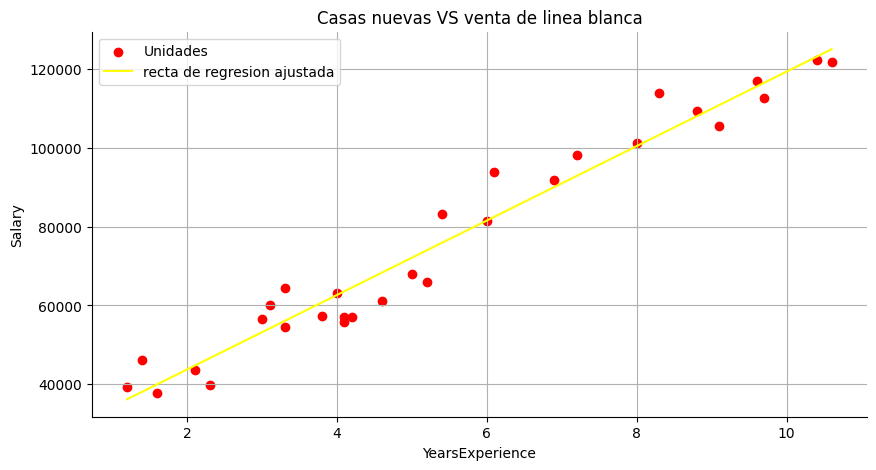

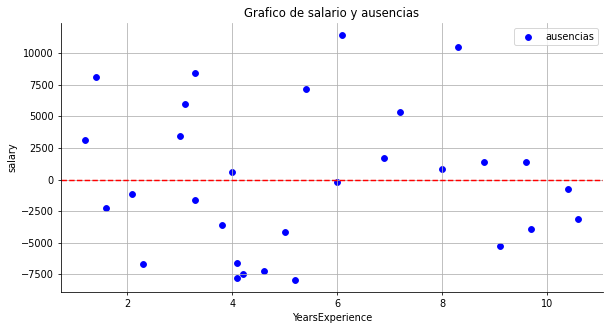

In [17]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/NaomiTapia/Estadisticaverano1/refs/heads/main/Salary_dataset.csv")
df
x=df["YearsExperience"]
y=df["Salary"]

#2 Realice un diagrama de dispersión para estos datos.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5),dpi=100)
plt.scatter(x,y,label="Unidades",color="red")
plt.title("Casas nuevas VS venta de linea blanca")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.grid()
plt.gca().spines[["top","right"]].set_visible(False)

#3¿Los datos soportan la suposición de linealidad?
#Si

#4 Calcule el coeficiente de correlación e interprete el resultado.
from scipy.stats import pearsonr
r,_=pearsonr(x,y)
print(f"coeficiente de correlacion:{r=:0.4f}\n")

#6 Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
yc= modelo.predict(x_constante)
print(yc)
plt.plot(x,yc,color="yellow",label="recta de regresion ajustada")
plt.legend()
#5Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print(f"coeficiente de determinacion:{r2=:0.4f}\n")

#7 Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
#regresión ajustada ( b1 )
print("coeficiente de determinacion=",r2)
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
yc= modelo.predict(x_constante)
print(yc)
plt.legend()
print("intervalos de confianza",modelo.conf_int(0.05))
residuales=y-yc

#8 Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
#¿Parece que se verifican los supuestos?
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5),dpi=70)
plt.scatter(x,residuales,label="ausencias",color="blue")
plt.axhline(y=0,color="red",linestyle="--")
plt.title("Grafico de salario y ausencias")
plt.xlabel("YearsExperience")
plt.ylabel("salary")
plt.legend()
plt.grid()
plt.gca().spines[["top","right"]].set_visible(False)
print(residuales)

#9 Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro #esta prueba me dice si hay normalidad en la distribucion
_,valor_p_sh=shapiro(residuales)
print(f"estadistico_shapiro={valor_p_sh}")
#10 Realice la prueba de Brausch-Pagan para los residuales y comente el resultado.
from statsmodels.stats.api import het_breuschpagan
_,valor_p_bp,_,_=het_breuschpagan(residuales,x_constante)
print(f"valor_p_bp={valor_p_bp}")

#11 Utiliza la recta de regresión para interpolar dos valores y extrapolar uno.
#Comenta estos resultados.
print(f"para x =5, y = {modelo.predict([1, 5])}")
print(f"para x =3, y = {modelo.predict([1, 3])}")
print(f"para x =1, y = {modelo.predict([1, 1])}\n")
print(modelo.get_prediction([1, 4]).summary_frame(alpha=0.05))

#12 Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
modelo_anova=ols("Salary ~ YearsExperience",data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_anova)
print(tabla_anova)
#Conclusiones: soporta la suposicion de la linealidad
#homoscedasticidad, normal(shapiro), relacion fuerte r=0.97 valor p=0.000000...
#Modelo confiable para interpretar